# Data Cleaning


In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.compose import make_column_selector

## Loading the dataset

In [140]:
# Loading the dataset
path = "/Users/Elena/code/Xryrapier/eficient_frontier/raw_data/SCFP2019.csv"
data = pd.read_csv(path)
# Selecting some columns of interest
selected_features = ['HHSEX',
                     'AGE', 
                     'EDCL',
                     'MARRIED',
                     'KIDS',
                     'FAMSTRUCT',
                     'OCCAT1',
                     'INCOME',
                     'WSAVED',
                     'YESFINRISK',
                     'NETWORTH',
                     'LIQ',
                     'CDS',
                     'SAVBND',
                     'CASHLI',
                     'NMMF',
                     'STOCKS',
                     'BOND']

data = data[selected_features].copy()

data.head()

,HHSEX,AGE,EDCL,MARRIED,KIDS,FAMSTRUCT,OCCAT1,INCOME,WSAVED,YESFINRISK,NETWORTH,LIQ,CDS,SAVBND,CASHLI,NMMF,STOCKS,BOND
0,2,75,4,2,0,3,1,67195.781504,2,0,2153600.0,6000,25000,0,44000,0,0,401000
1,2,75,4,2,0,3,1,57014.602488,2,0,2116200.0,6000,29000,0,44000,0,0,369000
2,2,75,4,2,0,3,1,51924.012980,2,0,2145000.0,6000,29000,0,44000,0,0,399000
3,2,75,4,2,0,3,1,41742.833964,2,0,2552500.0,6000,28000,0,44000,0,0,800000
4,2,75,4,2,0,3,1,50905.895078,2,0,2176200.0,6000,27000,0,44000,0,0,419000


## Adding a new column - target

In [141]:
data['RiskFree'] = data['LIQ'] + data['CDS'] + data['SAVBND'] + data['CASHLI']
data['Risky'] = data['NMMF'] + data['STOCKS'] + data['BOND']
data['RT'] = data['Risky'] / (data['Risky'] + data['RiskFree'])

## Dropping columns we don't need

In [142]:
data.drop(columns = ["RiskFree"], inplace = True)
data.drop(columns = ["Risky"], inplace = True)
data.drop(columns = ["LIQ"], inplace = True)
data.drop(columns = ["CDS"], inplace = True)
data.drop(columns = ["SAVBND"], inplace = True)
data.drop(columns = ["CASHLI"], inplace = True)
data.drop(columns = ["NMMF"], inplace = True)
data.drop(columns = ["STOCKS"], inplace = True)
data.drop(columns = ["BOND"], inplace = True)

## Dropping duplicates

In [143]:
duplicate_count = data.duplicated().sum()
duplicate_count

5064

In [144]:
len(data)

28885

In [145]:
data = data.drop_duplicates()
len(data)

23821

## Checking missing data

In [146]:
data.isnull().sum().sort_values(ascending=False)/len(data)

RT            0.00932
HHSEX         0.00000
AGE           0.00000
EDCL          0.00000
MARRIED       0.00000
KIDS          0.00000
FAMSTRUCT     0.00000
OCCAT1        0.00000
INCOME        0.00000
WSAVED        0.00000
YESFINRISK    0.00000
NETWORTH      0.00000
dtype: float64

In [147]:
data = data.dropna(subset=['RT'])
data['RT'].isna().any()

False

In [148]:
data.isnull().sum().sort_values(ascending=False)/len(data)

HHSEX         0.0
AGE           0.0
EDCL          0.0
MARRIED       0.0
KIDS          0.0
FAMSTRUCT     0.0
OCCAT1        0.0
INCOME        0.0
WSAVED        0.0
YESFINRISK    0.0
NETWORTH      0.0
RT            0.0
dtype: float64

## Getting rid of outliers (very high income)

In [149]:
q1_income = data['INCOME'].describe()['25%']
q3_income = data['INCOME'].describe()['75%']

iqr_income = q3_income - q1_income
lower_bound = np.max([q1_income - 1.5*iqr_income,0])
upper_bound = q3_income + 1.5*iqr_income

normal_people = data['INCOME'] < upper_bound
data_normal = data[normal_people]

In [150]:
data_normal.shape

(19748, 12)

## Train test split

In [151]:
y = data_normal['RT']
X = data_normal.drop(columns=['RT'])

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [153]:
X_train

,HHSEX,AGE,EDCL,MARRIED,KIDS,FAMSTRUCT,OCCAT1,INCOME,WSAVED,YESFINRISK,NETWORTH
9371,1,85,1,2,0,3,3,10181.179016,2,0,200500.0
20121,1,36,4,2,0,2,1,50905.895078,3,0,69400.0
19680,1,77,4,2,0,3,3,31561.654949,3,0,56700.0
9531,1,57,3,1,0,5,3,38688.480260,2,0,144750.0
2601,1,37,4,1,1,4,1,117083.558680,2,0,281970.0
...,...,...,...,...,...,...,...,...,...,...,...
18906,1,59,4,1,0,5,1,358377.501350,3,0,2720750.0
8484,1,71,3,1,0,5,3,32579.772850,2,0,58970.0
25792,1,61,4,1,0,5,1,316634.667390,3,0,4186730.0
15450,1,53,2,1,1,4,2,101811.790160,3,0,1753100.0


## Numerical features

In [154]:
numerical_features = ['AGE', 'KIDS', 'INCOME', 'NETWORTH']

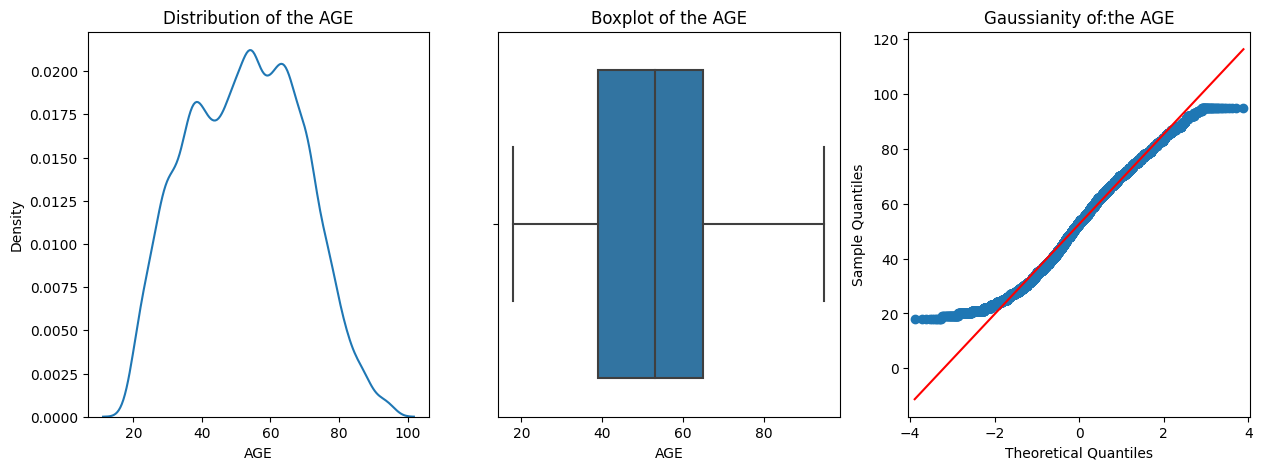

In [155]:
variable = 'AGE'
y = data_normal[f"{variable}"]

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.kdeplot(data = data_normal, x = f"{variable}", ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = data_normal, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of:the {variable}")
qqplot(data_normal[f"{variable}"],line='s',ax=ax[2]);

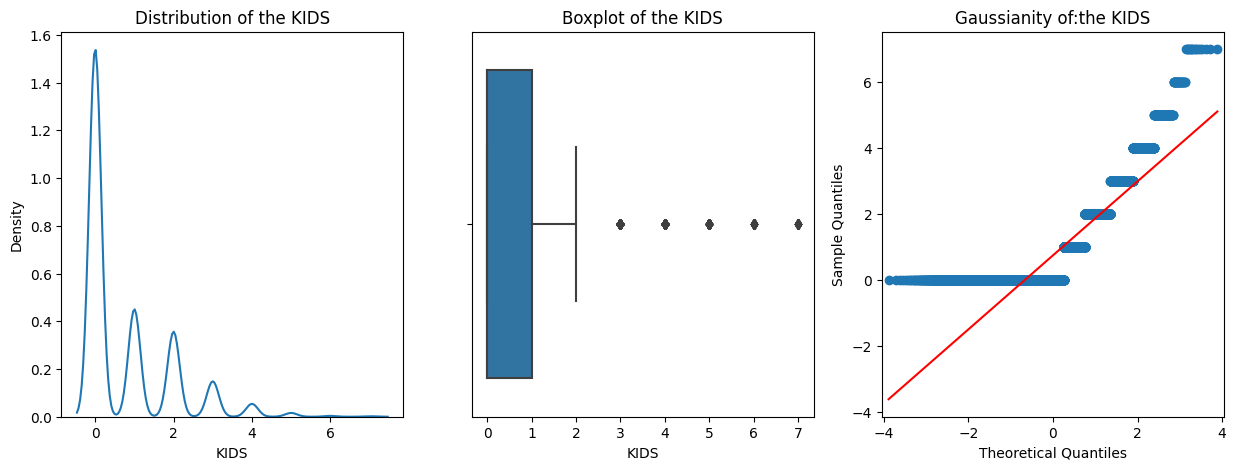

In [156]:
variable = 'KIDS'
y = data_normal[f"{variable}"]

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.kdeplot(data = data_normal, x = f"{variable}", ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = data_normal, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of:the {variable}")
qqplot(data_normal[f"{variable}"],line='s',ax=ax[2]);

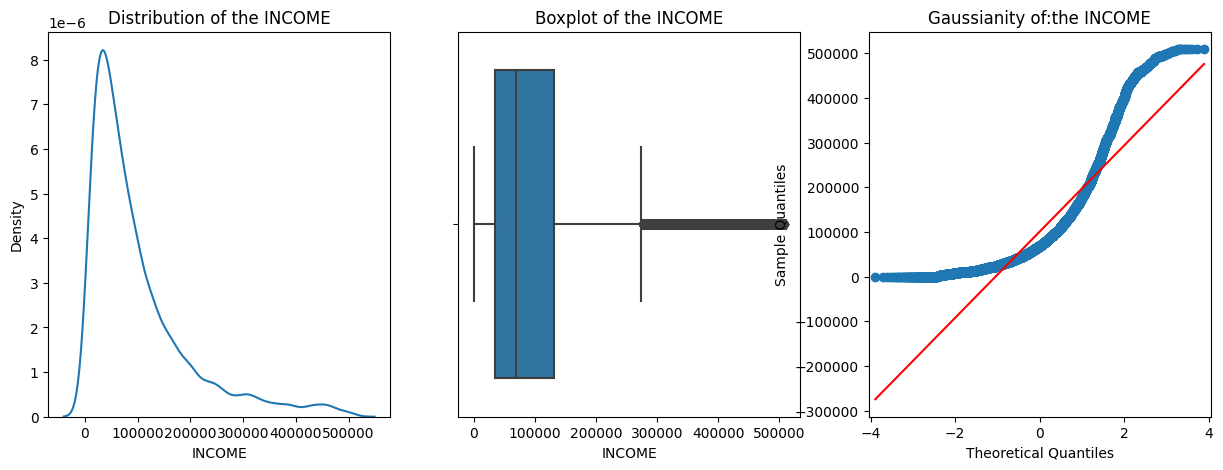

In [157]:
variable = 'INCOME'
y = data_normal[f"{variable}"]

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.kdeplot(data = data_normal, x = f"{variable}", ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = data_normal, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of:the {variable}")
qqplot(data_normal[f"{variable}"],line='s',ax=ax[2]);

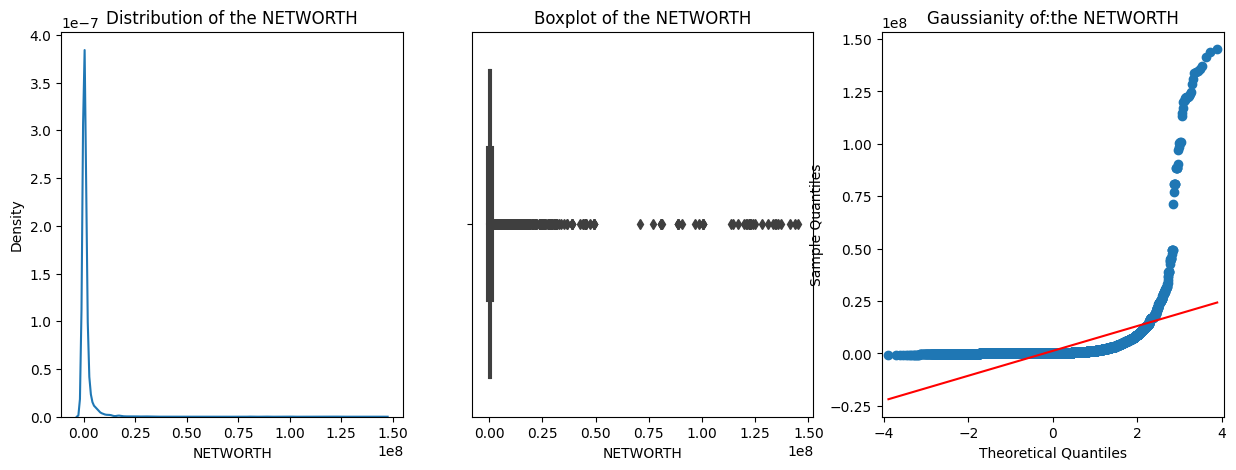

In [158]:
variable = 'NETWORTH'
y = data_normal[f"{variable}"]

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.kdeplot(data = data_normal, x = f"{variable}", ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = data_normal, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of:the {variable}")
qqplot(data_normal[f"{variable}"],line='s',ax=ax[2]);

In [159]:
robust_features = ['INCOME', 'NETWORTH']
standard_features = ['AGE']
minmax_features = ['KIDS']

scalers = ColumnTransformer([
    ("robust_scaler", RobustScaler(), robust_features),
    ("standard_scaler", StandardScaler(), standard_features),
    ("minmax_scaler", MinMaxScaler(), minmax_features),        
], remainder="passthrough").set_output(transform='pandas')

num_transformer = Pipeline([
    ("num_imputer", SimpleImputer(strategy="median")),
    ("scalers", scalers)
])

num_transformer

Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                ('scalers',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['INCOME', 'NETWORTH']),
                                                 ('standard_scaler',
                                                  StandardScaler(), ['AGE']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['KIDS'])]))])

## Categorical features

In [160]:
ordinal_features = []
ohe_features = ['HHSEX', 'MARRIED', 'OCCAT1', 'WSAVED', 'FAMSTRUCT']

encoders = ColumnTransformer([
    ("ordinalencoder", OrdinalEncoder(), ordinal_features),
    ("onehotencoder", OneHotEncoder(drop='if_binary',
                                    sparse_output=False,
                                    handle_unknown="ignore",
                                    min_frequency=5), ohe_features),
], remainder="passthrough")

cat_transformer = Pipeline([
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("encoders", encoders)
])

cat_transformer

Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                ('encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(), []),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                min_frequency=5,
                                                                sparse_output=False),
                                                  ['HHSEX', 'MARRIED', 'OCCAT1',
                                                   'WSAVED', 'FAMSTRUCT'])]))])

## Column Transformer

In [161]:
data_normal.dtypes

HHSEX           int64
AGE             int64
EDCL            int64
MARRIED         int64
KIDS            int64
FAMSTRUCT       int64
OCCAT1          int64
INCOME        float64
WSAVED          int64
YESFINRISK      int64
NETWORTH      float64
RT            float64
dtype: object

In [162]:
num_features = ['AGE', 'KIDS', 'INCOME', 'NETWORTH']
cat_features = ['HHSEX', 'MARRIED', 'OCCAT1', 'WSAVED', 'FAMSTRUCT', 'YESFINRISK', 'EDCL']

final_preprocessor = ColumnTransformer([
    ("num_transformer", num_transformer, num_features),
    ("cat_transformer", cat_transformer, cat_features),
], remainder="passthrough").set_output(transform="pandas")

final_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transformer',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalers',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('robust_scaler',
                                                                                   RobustScaler(),
                                                                                   ['INCOME',
                                                                                    'NETWORTH']),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['AGE']),
                                                                                  ('minmax_scaler',
                                                                                   MinMaxScaler(),
                                                                                   ['KIDS'])])...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoders',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('ordinalencoder',
                                                                                   OrdinalEncoder(),
                                                                                   []),
                                                                                  ('onehotencoder',
                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                 handle_unknown='ignore',
                                                                                                 min_frequency=5,
                                                                                                 sparse_output=False),
                                                                                   ['HHSEX',
                                                                                    'MARRIED',
                                                                                    'OCCAT1',
                                                                                    'WSAVED',
                                                                                    'FAMSTRUCT'])]))]),
                                 ['HHSEX', 'MARRIED', 'OCCAT1', 'WSAVED',
                                  'FAMSTRUCT', 'YESFINRISK', 'EDCL'])])

In [163]:
final_preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transformer',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalers',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('robust_scaler',
                                                                                   RobustScaler(),
                                                                                   ['INCOME',
                                                                                    'NETWORTH']),
                                                                                  ('standard_scaler',
                                                                                   StandardScaler(),
                                                                                   ['AGE']),
                                                                                  ('minmax_scaler',
                                                                                   MinMaxScaler(),
                                                                                   ['KIDS'])])...
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoders',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('ordinalencoder',
                                                                                   OrdinalEncoder(),
                                                                                   []),
                                                                                  ('onehotencoder',
                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                 handle_unknown='ignore',
                                                                                                 min_frequency=5,
                                                                                                 sparse_output=False),
                                                                                   ['HHSEX',
                                                                                    'MARRIED',
                                                                                    'OCCAT1',
                                                                                    'WSAVED',
                                                                                    'FAMSTRUCT'])]))]),
                                 ['HHSEX', 'MARRIED', 'OCCAT1', 'WSAVED',
                                  'FAMSTRUCT', 'YESFINRISK', 'EDCL'])])

In [164]:
X_train_preprocessed = final_preprocessor.transform(X_train)
X_test_preprocessed = final_preprocessor.transform(X_test)

In [165]:
X_train_preprocessed

,num_transformer__robust_scaler__INCOME,num_transformer__robust_scaler__NETWORTH,num_transformer__standard_scaler__AGE,num_transformer__minmax_scaler__KIDS,cat_transformer__onehotencoder__HHSEX_2,cat_transformer__onehotencoder__MARRIED_2,cat_transformer__onehotencoder__OCCAT1_1,cat_transformer__onehotencoder__OCCAT1_2,cat_transformer__onehotencoder__OCCAT1_3,cat_transformer__onehotencoder__OCCAT1_4,cat_transformer__onehotencoder__WSAVED_1,cat_transformer__onehotencoder__WSAVED_2,cat_transformer__onehotencoder__WSAVED_3,cat_transformer__onehotencoder__FAMSTRUCT_1,cat_transformer__onehotencoder__FAMSTRUCT_2,cat_transformer__onehotencoder__FAMSTRUCT_3,cat_transformer__onehotencoder__FAMSTRUCT_4,cat_transformer__onehotencoder__FAMSTRUCT_5,cat_transformer__remainder__YESFINRISK,cat_transformer__remainder__EDCL
9371,-0.617021,0.038949,1.977202,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
20121,-0.191489,-0.156020,-1.002789,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,4
19680,-0.393617,-0.174907,1.490673,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,4
9531,-0.319149,-0.043961,0.274350,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,3
2601,0.500000,0.160109,-0.941973,0.142857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18906,3.021277,3.787007,0.395982,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,4
8484,-0.382979,-0.171531,1.125776,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,3
25792,2.585106,5.967178,0.517615,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,4
15450,0.340426,2.347940,0.031086,0.142857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,2


## Export the preprocessed dataset

In [166]:
y_train = pd.DataFrame(y_train)

In [167]:
y_test = pd.DataFrame(y_test)

In [168]:
X_train_preprocessed.to_csv("/Users/Elena/code/Xryrapier/eficient_frontier/X_train_preprocessed.csv", index=False)

In [169]:
X_test_preprocessed.to_csv("/Users/Elena/code/Xryrapier/eficient_frontier/X_test_preprocessed.csv", index=False)

In [170]:
y_train.to_csv("/Users/Elena/code/Xryrapier/eficient_frontier/y_train.csv", index=False)

In [171]:
y_test.to_csv("/Users/Elena/code/Xryrapier/eficient_frontier/y_test.csv", index=False)